<a href="https://colab.research.google.com/github/xuxiufeng/Blockchain_Simulation_Multiple_Hackers_with_Resetting_Times/blob/main/Gamma_Weibull_Gamma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import weibull_min

In [2]:
np.random.seed(1)

In [3]:
k = 7

Generate $\eta_j$ and $\delta_j$, where $j=1,2,3,4$.

In [4]:
eta_list = np.random.uniform(1/6,1/3,k)
delta_list = np.random.uniform(1/7,1/3,k)
eta_list, delta_list

(array([0.23617033, 0.28672075, 0.16668573, 0.21705543, 0.19112598,
        0.18205643, 0.19771004]),
 array([0.20867823, 0.2184319 , 0.2454889 , 0.22270372, 0.27337514,
        0.18180043, 0.31011761]))

For $X\sim Gamma(\eta_j, \delta_j)$, we have
\begin{eqnarray*}
f(x)=\frac{\delta_j^{\eta_j}}{\Gamma(\eta_j)}x^{\eta_j-1}e^{-\delta_j x}
\end{eqnarray*}

In [5]:
def ET_m(m, eta_list, delta_list, alpha, beta, theta, tau):
    def Generate_Z(m, eta_list, delta_list):
        sum_of_x_list = []
        for i in range(len(eta_list)):
            sum_of_x_list.append(np.sum(np.random.gamma(eta_list[i], 1/delta_list[i], m)))
        Z = min(sum_of_x_list)
        return Z
    def T_m(m, eta_list, delta_list, alpha, beta, theta, tau):
        sum_of_time = 0
        sum_of_w = 0
        y = weibull_min.rvs(c=beta, scale=alpha)
        w = np.random.gamma(theta, 1/tau)
        Z_m = Generate_Z(m, eta_list, delta_list)
        while Z_m > y:
            sum_of_time = sum_of_time + y + w
            sum_of_w += w
            Z_m = Generate_Z(m, eta_list, delta_list)
            y = weibull_min.rvs(c=beta, scale=alpha)
            w = np.random.gamma(theta, 1/tau)
        return sum_of_time + Z_m, sum_of_w

    ET = np.repeat(np.nan, m)
    sum_w = np.repeat(np.nan, m)
    for i in range(m):
        T_0 = 0
        W_0 = 0
        iter = 30000 # iter 30000
        for j in range(iter):
            T_0 += T_m(i+1, eta_list, delta_list, alpha, beta, theta, tau)[0]
            W_0 += T_m(i+1, eta_list, delta_list, alpha, beta, theta, tau)[1]
        ET[i] = T_0/iter
        sum_w[i] = W_0/iter
        print(ET[i])
    return ET, sum_w



0.5325486480346056
1.0362859749409932
1.41369971465544
1.8264616808090792
2.2292898625245554
2.6847572163380895
3.132259294190192
3.5999137619567896
4.071971184173546
4.571360498309228
5.120541673214737
5.642992071022697
6.139418533773984
6.676053014290564
7.261754273703894
7.7980605389796045
8.441977943205066
9.018047740800666
9.579197016485985
10.17887042851296
10.86652768861683
11.414561453131126
12.013386932519408
12.655554929567703
13.319272488941689
13.869449269469182
14.48450609657946
15.169628353125248
15.868335045538464
16.387277738010983
16.947722036259556
17.714461190332596
18.3538447590077
18.971383561530708
19.664289270696706
20.317015521773953
20.954472609857966
21.654748273164113
22.23474233687477
22.788734532911718


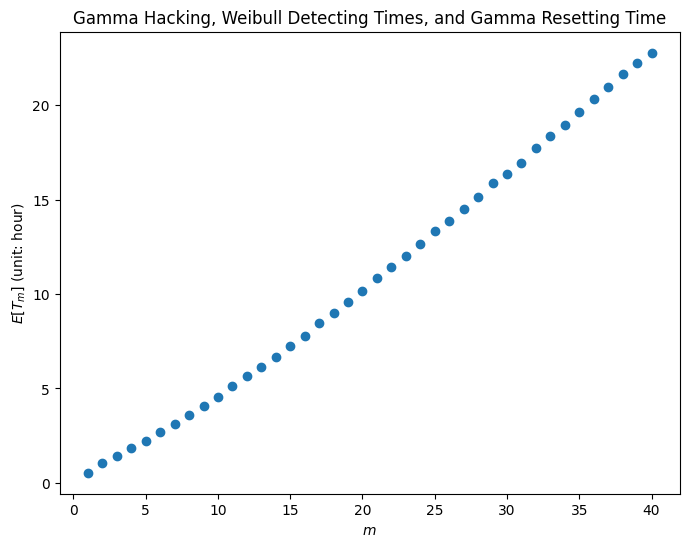

In [6]:
m = 40
alpha = 1/10
beta = 1/13
theta = 1/5
tau = 1/4
ET_m, sum_w = ET_m(m, eta_list, delta_list, alpha, beta, theta, tau)
fig = plt.figure(figsize=(8, 6))
plt.scatter(range(1, m+1), ET_m)
plt.xlabel(r'$m$')
plt.ylabel(r'$E[T_m]$ (unit: hour)')
plt.title('Gamma Hacking, Weibull Detecting Times, and Gamma Resetting Time')
plt.show()

In [7]:
R = [1.1*c**1.2 for c in range(1, m+1)]
C_2 = [.2*c**1.4 for c in range(1, m+1)]
C_1 = [2*c**1.3  for c in range(1, m+1)]
E_mNR = np.repeat(np.nan, len(ET_m))
for j in range(m):
  E_mNR[j] = ((ET_m[j]-sum_w[j])*(R[j] - C_2[j]) - C_1[j]*sum_w[j])/ET_m[j]
m_max = np.where(E_mNR == max(E_mNR))[0][0] + 1
print(m_max, max(E_mNR))
E_mNR

40 21.742618529072455


array([ -1.98155622,  -4.58759381,  -7.13025979,  -9.02589096,
        -9.74387706, -10.51729199, -10.82790072, -10.77568069,
       -11.22139256, -10.42790673,  -9.53954054,  -9.35095768,
        -8.44445805,  -8.16754904,  -6.94946977,  -6.1539551 ,
        -5.08627634,  -4.55526517,  -3.3178835 ,  -2.79636647,
        -1.45611171,  -0.40669906,   0.66429801,   2.32511928,
         3.62067198,   4.58383077,   5.27174459,   6.28061627,
         7.79078439,   8.48711055,   9.83547516,  11.34222383,
        13.06887357,  13.71763118,  15.34025511,  16.3353006 ,
        17.68059011,  19.18098691,  20.11697038,  21.74261853])

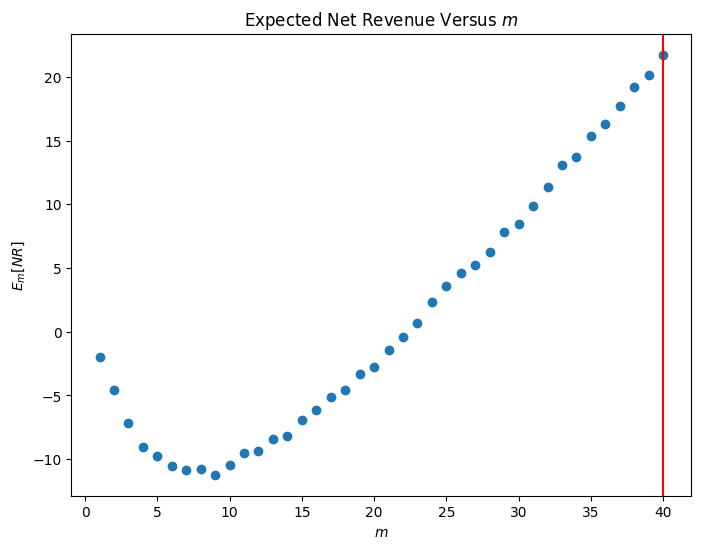

In [8]:
fig = plt.figure(figsize=(8, 6))
plt.scatter(range(1, m+1), E_mNR)
plt.axvline(x = m_max, c='red')
plt.xlabel(r'$m$')
plt.ylabel(r'$E_m[NR]$')
plt.title(r'Expected Net Revenue Versus $m$')
plt.show()